In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("16.csv", encoding="latin1")


### Country, year va sold ustunlar qo'shildi.

In [2]:


# 10 ta tasodifiy davlat nomlari
countries = ['USA', 'China', 'Japan', 'Germany', 'UK', 'France', 'Italy', 'Canada', 'South Korea', 'Australia']

# 'country' ustunini qo'shish
df['country'] = np.random.choice(countries, size=len(df))

# 10 yillikni ifodalovchi 'years' ustunini qo'shish
years = list(range(1960, 2021, 10))  # 1960 dan 2020 gacha har 10 yilda
df['years'] = np.random.choice(years, size=len(df))

# 'sold' ustunini qo'shish (tasodifiy sonlar)
df['sold'] = np.random.randint(1000, 100000, size=len(df))

df.to_csv('16_1.csv', index=False)


df = df.drop(columns="Unnamed: 0", axis=1) # index bilan bir xil bo'lgan column o'chirib tashlandi.

df.isna().sum()

carat      1812
cut        2145
color      1867
clarity    1784
price       367
x          1481
y          1193
z           741
country       0
years         0
sold          0
dtype: int64

### Dublicat ma'lumotlardan vos kechish


In [3]:
df = df.drop_duplicates()
df

,carat,cut,color,clarity,price,x,y,z,country,years,sold
0,0.23,Ideal,E,SI2,326.0,3.95,3.98,2.43,France,2010,52736
1,0.21,Premium,E,SI1,326.0,3.89,3.84,2.31,South Korea,1980,41036
2,0.23,Good,E,VS1,327.0,4.05,4.07,2.31,China,1980,50074
3,0.29,Premium,I,VS2,334.0,4.20,4.23,2.63,Italy,1970,26827
4,0.31,Good,J,SI2,335.0,4.34,4.35,2.75,France,2020,18559
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,NaN,SI1,2757.0,5.75,5.76,3.50,Japan,2000,35871
53936,0.72,Good,D,SI1,2757.0,5.69,NaN,3.61,Japan,2020,91064
53937,0.70,Very Good,D,SI1,2757.0,5.66,5.68,3.56,Germany,1980,34938
53938,0.86,Premium,H,SI2,2757.0,6.15,6.12,3.74,Japan,1970,55455


### Vizualizatsiya - Descriptive Statistics - Ma'lumotlarning asosiy statistik ko'rsatkichlari (o'rtacha, median, dispersiya)

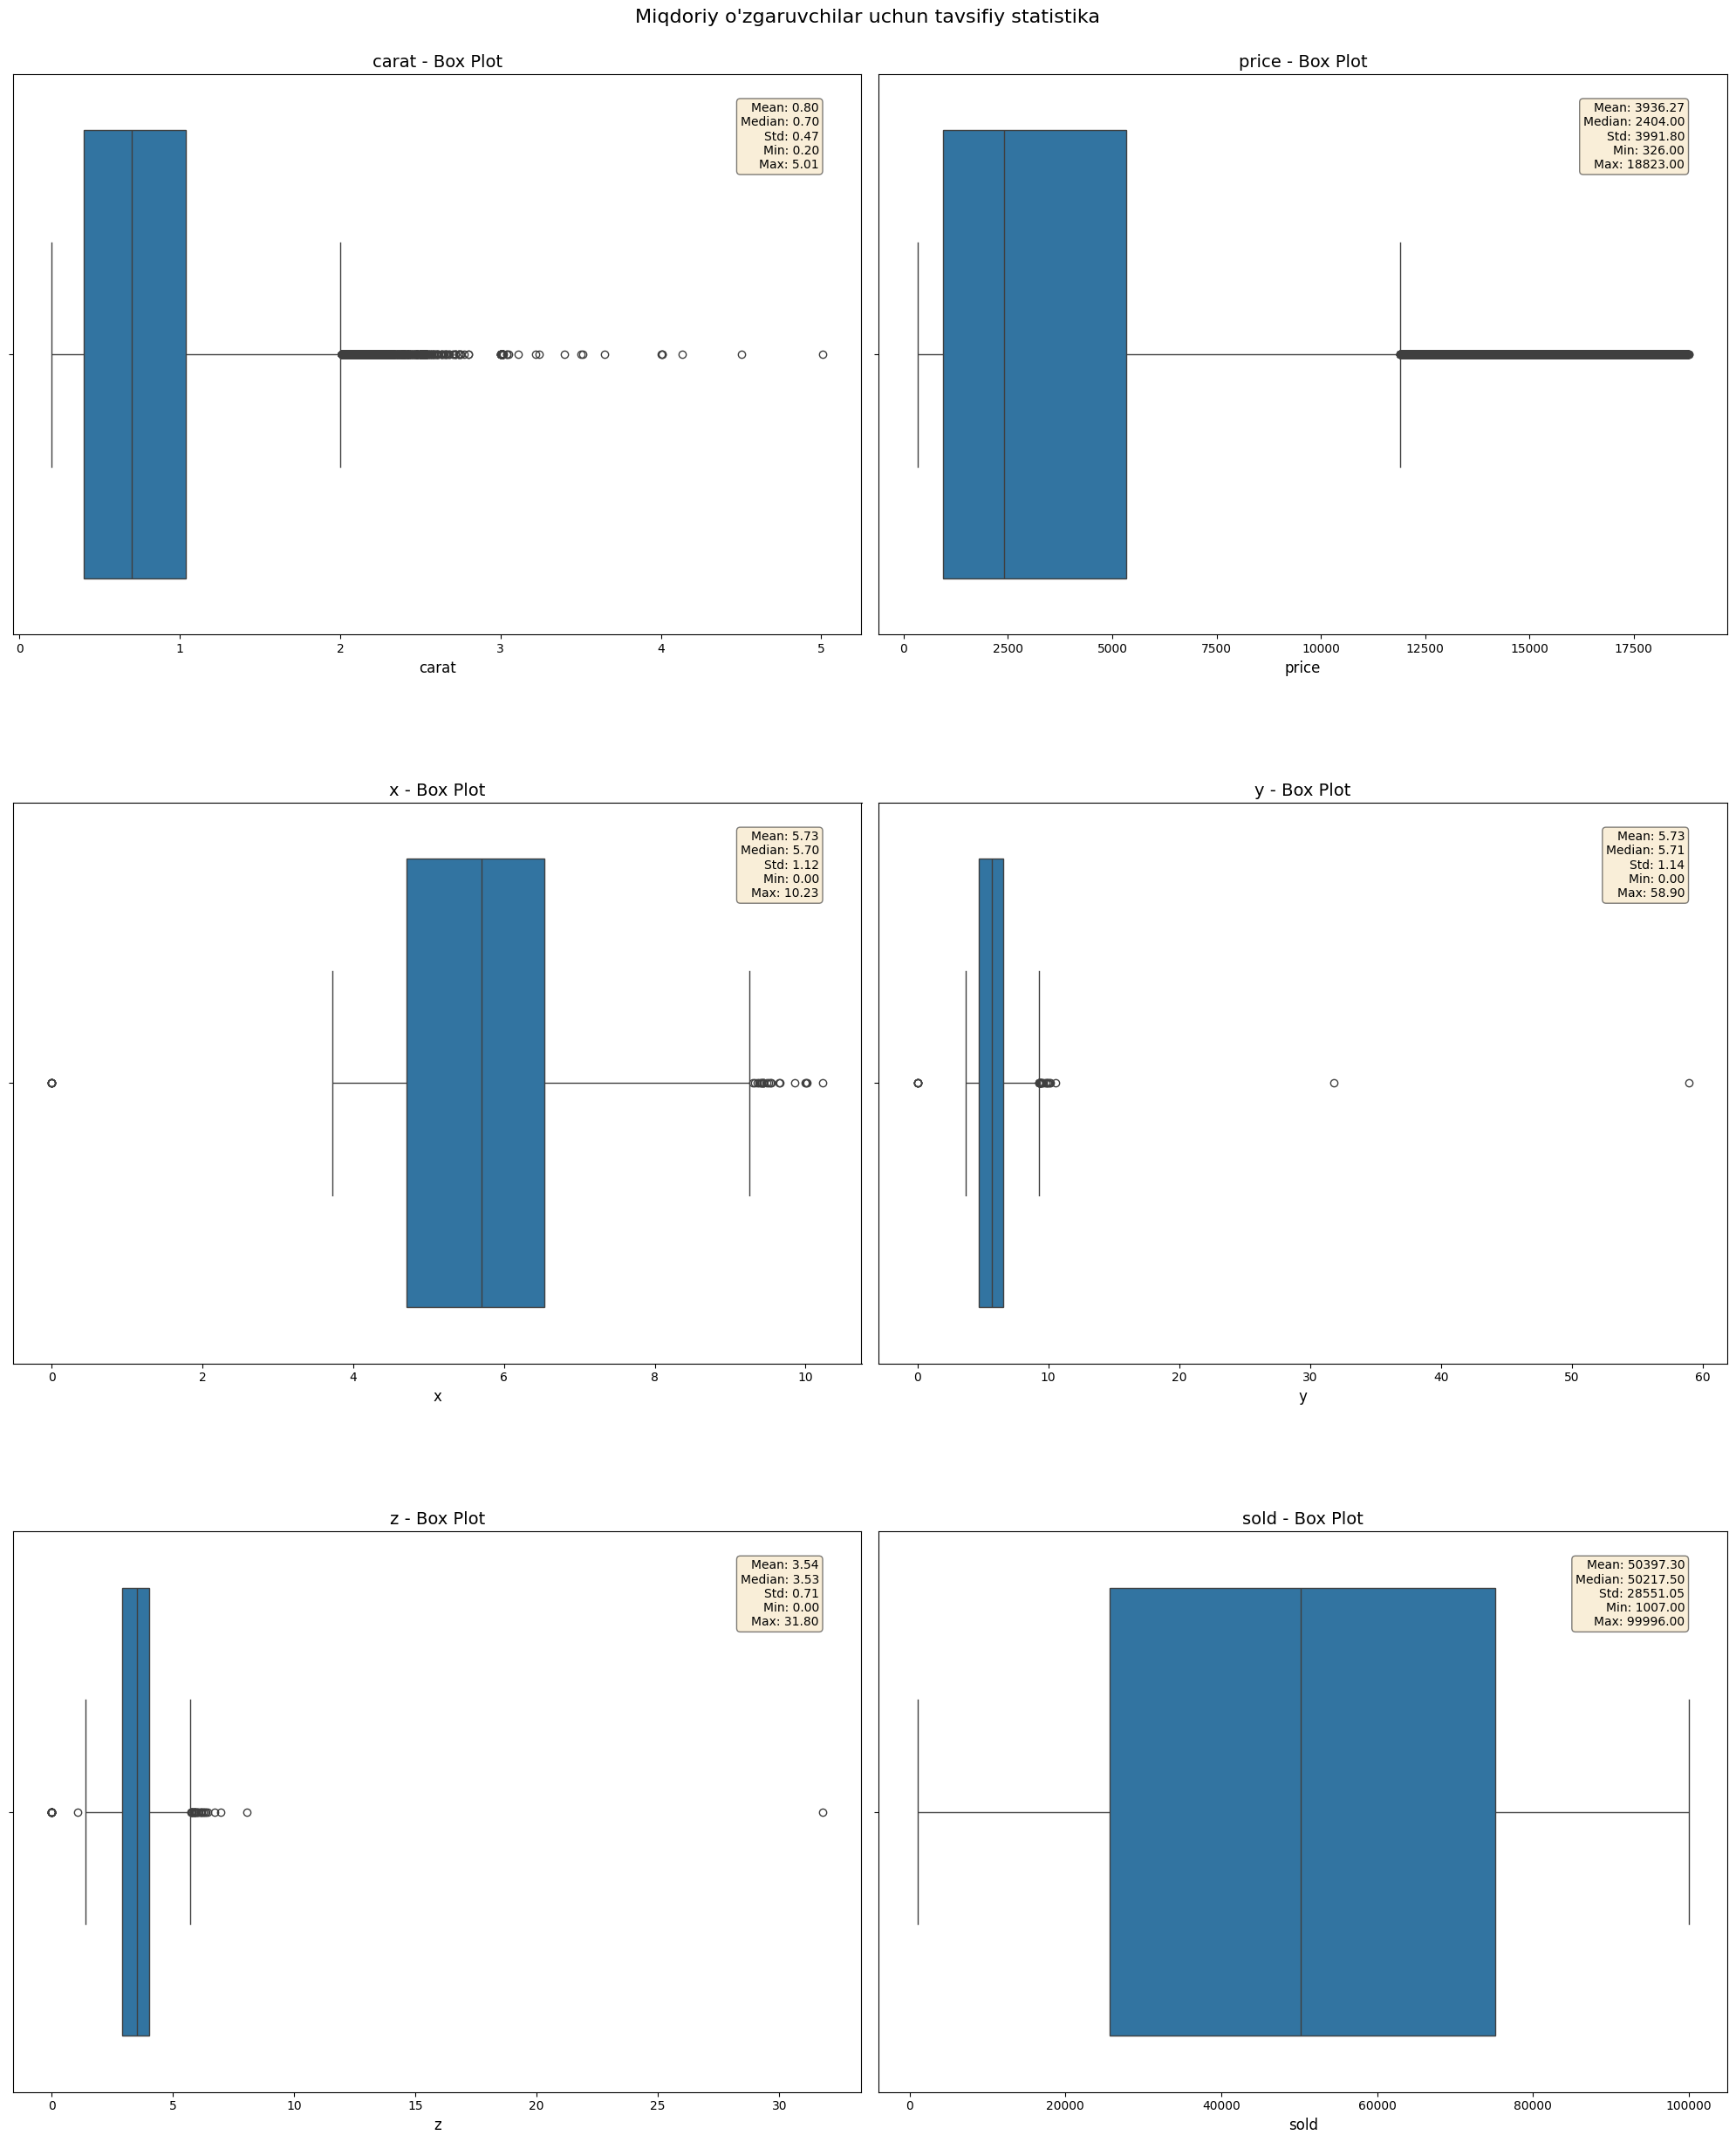

In [4]:


# Miqdoriy o'zgaruvchilarni tanlab olamiz
numeric_columns = ['carat', 'price', 'x', 'y', 'z', 'sold']

# Tavsifiy statistikani hisoblaymiz
desc_stats = df[numeric_columns].describe()

fig, axes = plt.subplots(3, 2, figsize=(20, 25))
fig.suptitle("Miqdoriy o'zgaruvchilar uchun tavsifiy statistika", fontsize=16)

for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f"{column} - Box Plot", fontsize=14)
    axes[row, col].set_xlabel(column, fontsize=12)
    
    # Statistik ma'lumotlarni qo'shamiz
    stats = desc_stats[column]
    textstr = '\n'.join((
        f"Mean: {stats['mean']:.2f}",
        f"Median: {stats['50%']:.2f}",
        f"Std: {stats['std']:.2f}",
        f"Min: {stats['min']:.2f}",
        f"Max: {stats['max']:.2f}"
    ))
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    axes[row, col].text(0.95, 0.95, textstr, transform=axes[row, col].transAxes, 
                        fontsize=10, verticalalignment='top', horizontalalignment='right',
                        bbox=props)

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.3)
plt.show()


### Korrelyatsiya matrisasi 

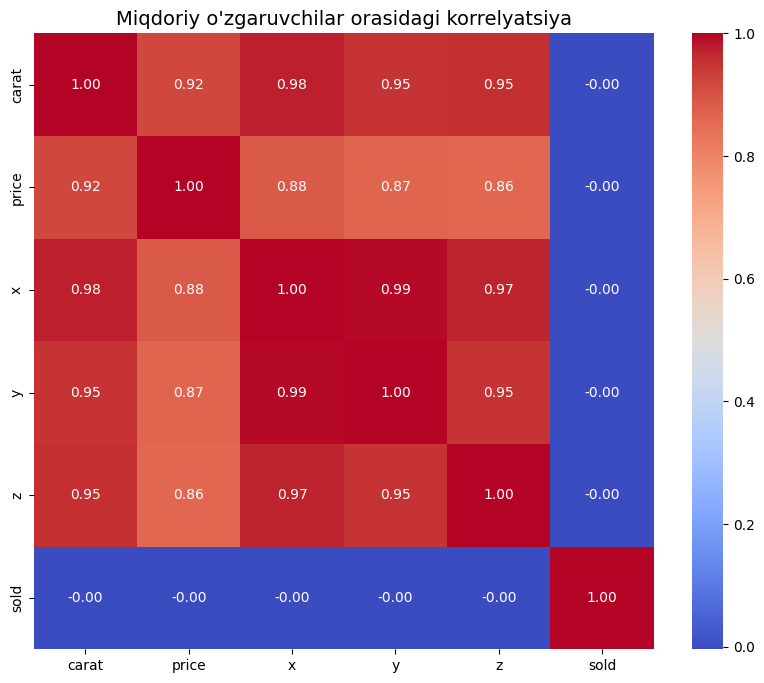

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Miqdoriy o'zgaruvchilar orasidagi korrelyatsiya", fontsize=14)
plt.show()

### Missing values haqida ma'lumot.

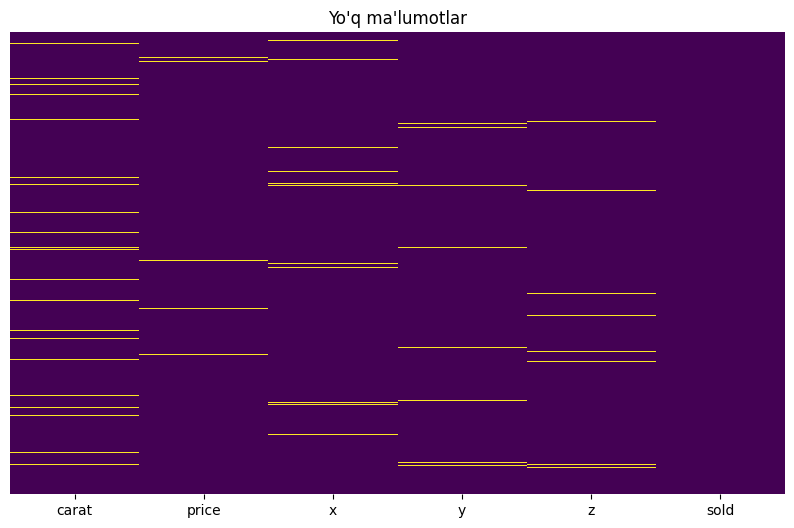

In [6]:
numeric_columns = ['carat', 'price', 'x', 'y', 'z', 'sold']

plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Yo'q ma'lumotlar")
plt.show()

### NAN qiymatlarni median(numeric) va mode(object) qiymatlar bilan to'ldirish.

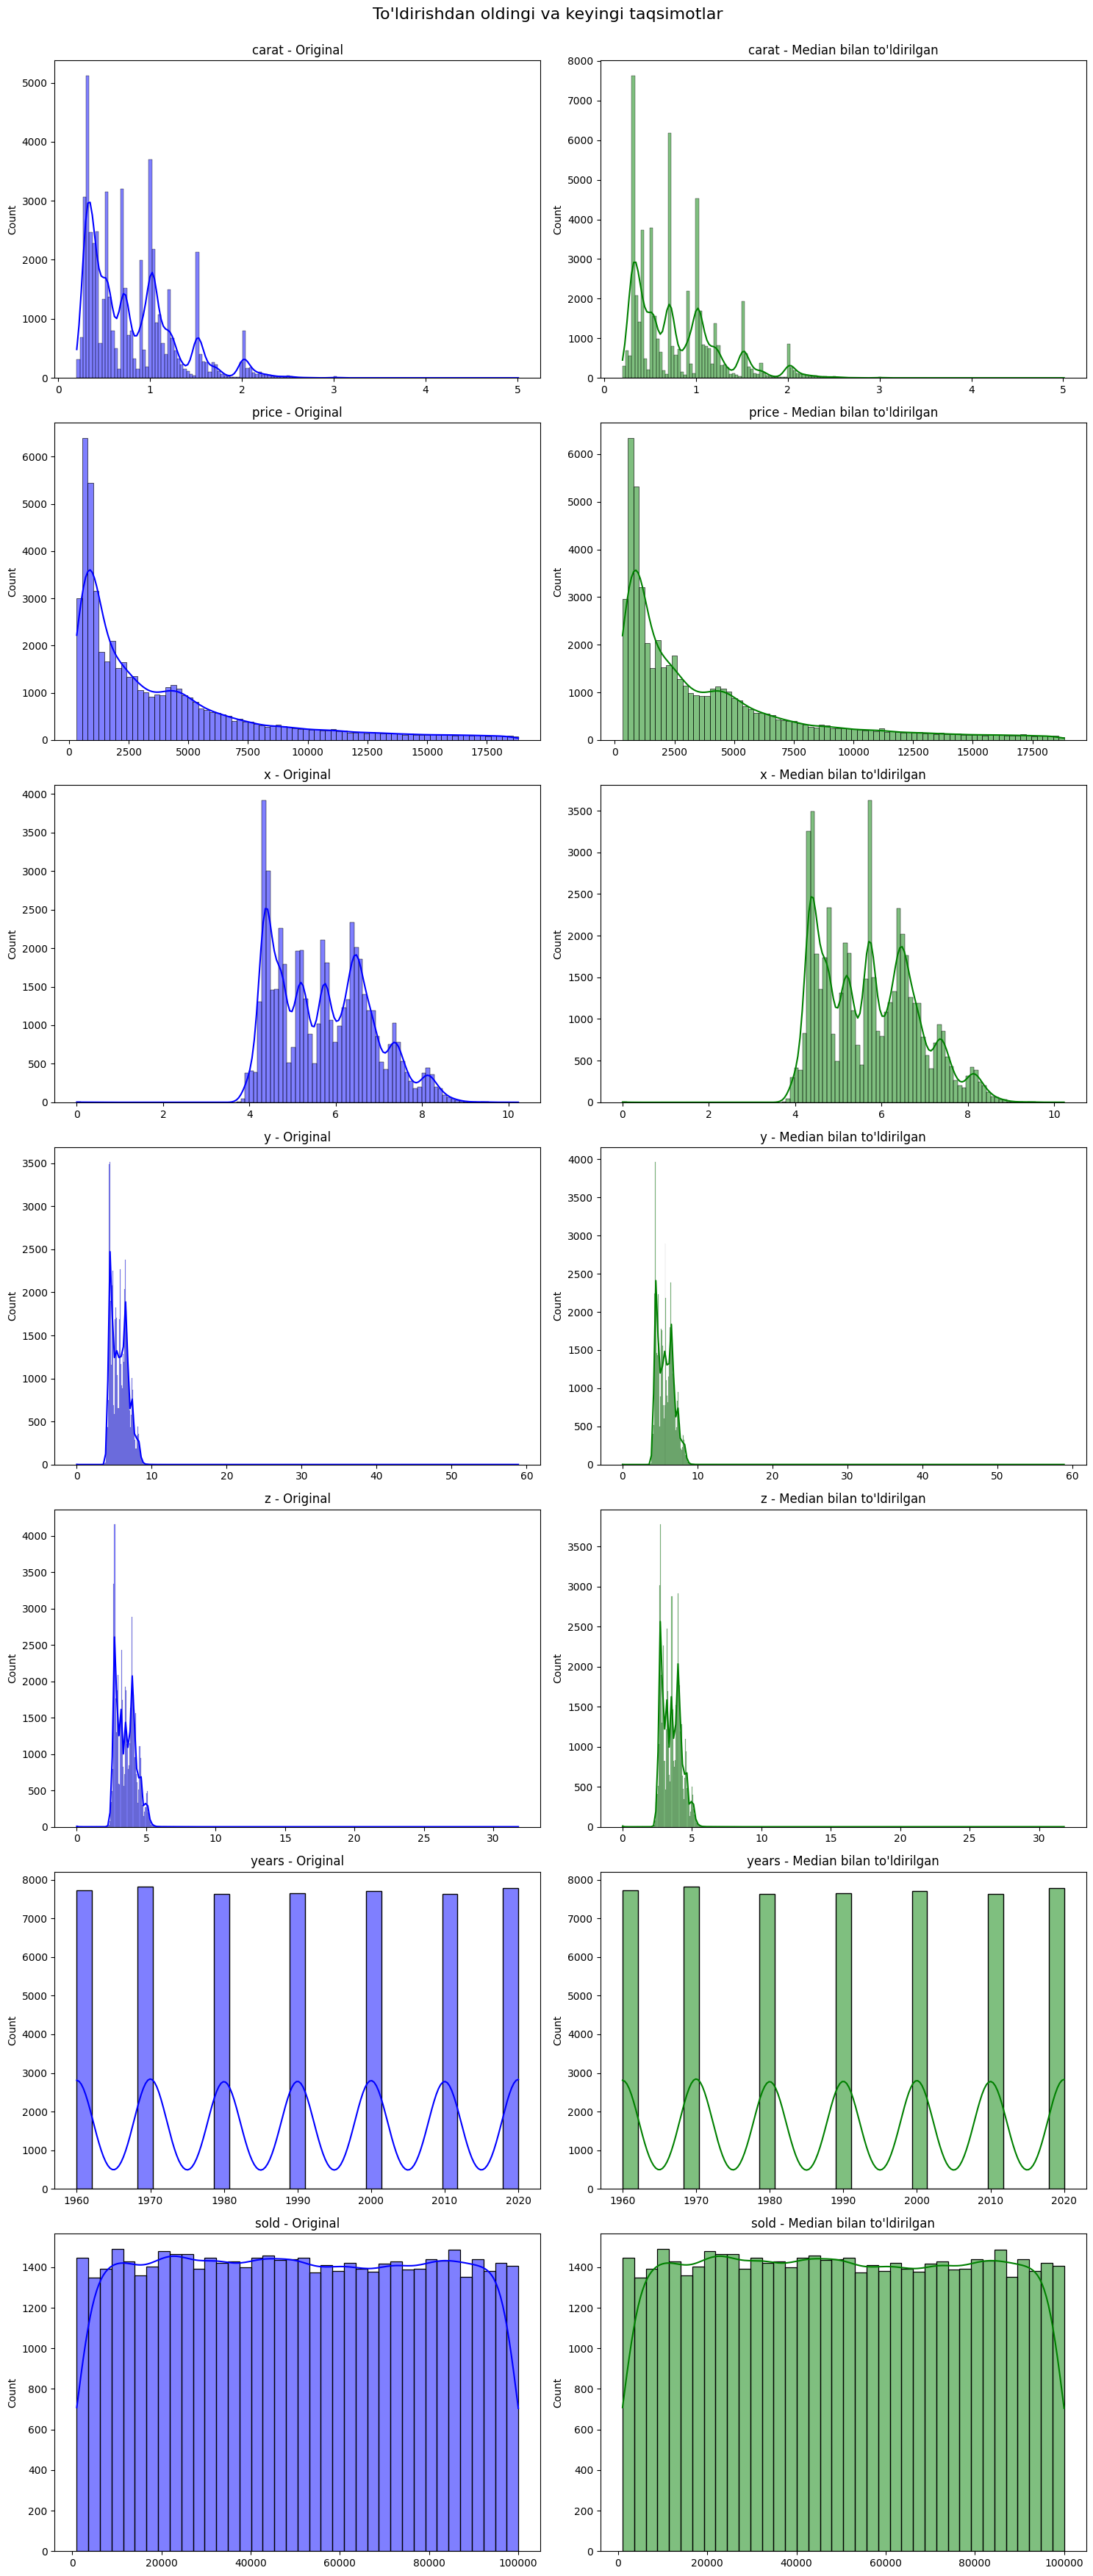

In [7]:


# Raqamli ustunlarni aniqlash
numeric_columns = df.select_dtypes("number").columns

# To'ldirishdan oldingi ma'lumotlarni saqlash
df_original = df[numeric_columns].copy()



num_df = df.select_dtypes("number").columns
obj_df = df.select_dtypes("object").columns
df[num_df] = df[num_df].fillna(df[num_df].median())
df[obj_df] = df[obj_df].apply(lambda x: x.fillna(x.mode()[0]))


# To'ldirishdan oldingi va keyingi taqsimotlarni vizualizatsiya qilamiz
fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(15, 5*len(numeric_columns)))
fig.suptitle("To'ldirishdan oldingi va keyingi taqsimotlar", fontsize=16, y=1)

color_original = 'blue'
color_filled = 'green'

for i, column in enumerate(numeric_columns):
    # To'ldirishdan oldingi taqsimot
    sns.histplot(df_original[column].dropna(), ax=axes[i, 0], kde=True, color=color_original)
    axes[i, 0].set_title(f"{column} - Original")
    axes[i, 0].set_xlabel("")
    
    # To'ldirishdan keyingi taqsimot
    sns.histplot(df[column], ax=axes[i, 1], kde=True, color=color_filled)
    axes[i, 1].set_title(f"{column} - Median bilan to'ldirilgan")
    axes[i, 1].set_xlabel("")

plt.tight_layout()
plt.show()



In [8]:

print("To'ldirishdan oldingi statistika:")
print(df_original.describe())

print("\nTo'ldirishdan keyingi statistika:")
print(df[numeric_columns].describe())




To'ldirishdan oldingi statistika:
              carat         price             x             y             z  \
count  52128.000000  53573.000000  52459.000000  52747.000000  53199.000000   
mean       0.797714   3936.272133      5.730519      5.733725      3.538892   
std        0.473770   3991.803882      1.121308      1.141586      0.705432   
min        0.200000    326.000000      0.000000      0.000000      0.000000   
25%        0.400000    950.000000      4.710000      4.720000      2.910000   
50%        0.700000   2404.000000      5.700000      5.710000      3.530000   
75%        1.040000   5331.000000      6.540000      6.540000      4.040000   
max        5.010000  18823.000000     10.230000     58.900000     31.800000   

              years          sold  
count  53940.000000  53940.000000  
mean    1989.982017  50397.303856  
std       20.043281  28551.053336  
min     1960.000000   1007.000000  
25%     1970.000000  25647.000000  
50%     1990.000000  50217.500000  
75

### Yillik sotuvlar va o'rtacha narx dinamikasi

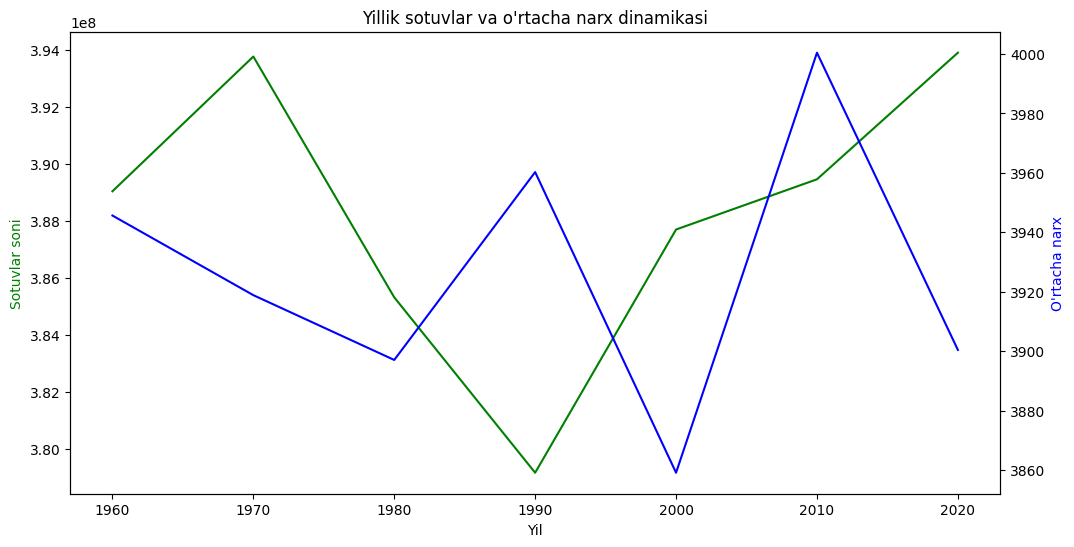

In [9]:

yearly_stats = df.groupby('years').agg({
    'price': 'mean',
    'sold': 'sum',
    'carat': 'mean'
})

fig, ax1 = plt.subplots(figsize=(12,6))
ax2 = ax1.twinx()
ax1.plot(yearly_stats.index, yearly_stats['sold'], 'g-')
ax2.plot(yearly_stats.index, yearly_stats['price'], 'b-')
ax1.set_xlabel('Yil')
ax1.set_ylabel('Sotuvlar soni', color='g')
ax2.set_ylabel("O'rtacha narx", color='b')
plt.title("Yillik sotuvlar va o'rtacha narx dinamikasi")
plt.show()                   

### Bu kod yordamida color va clarity ustunlari bo'yicha narx taqsimotini grafiklar orqali ko'rishingiz mumkin

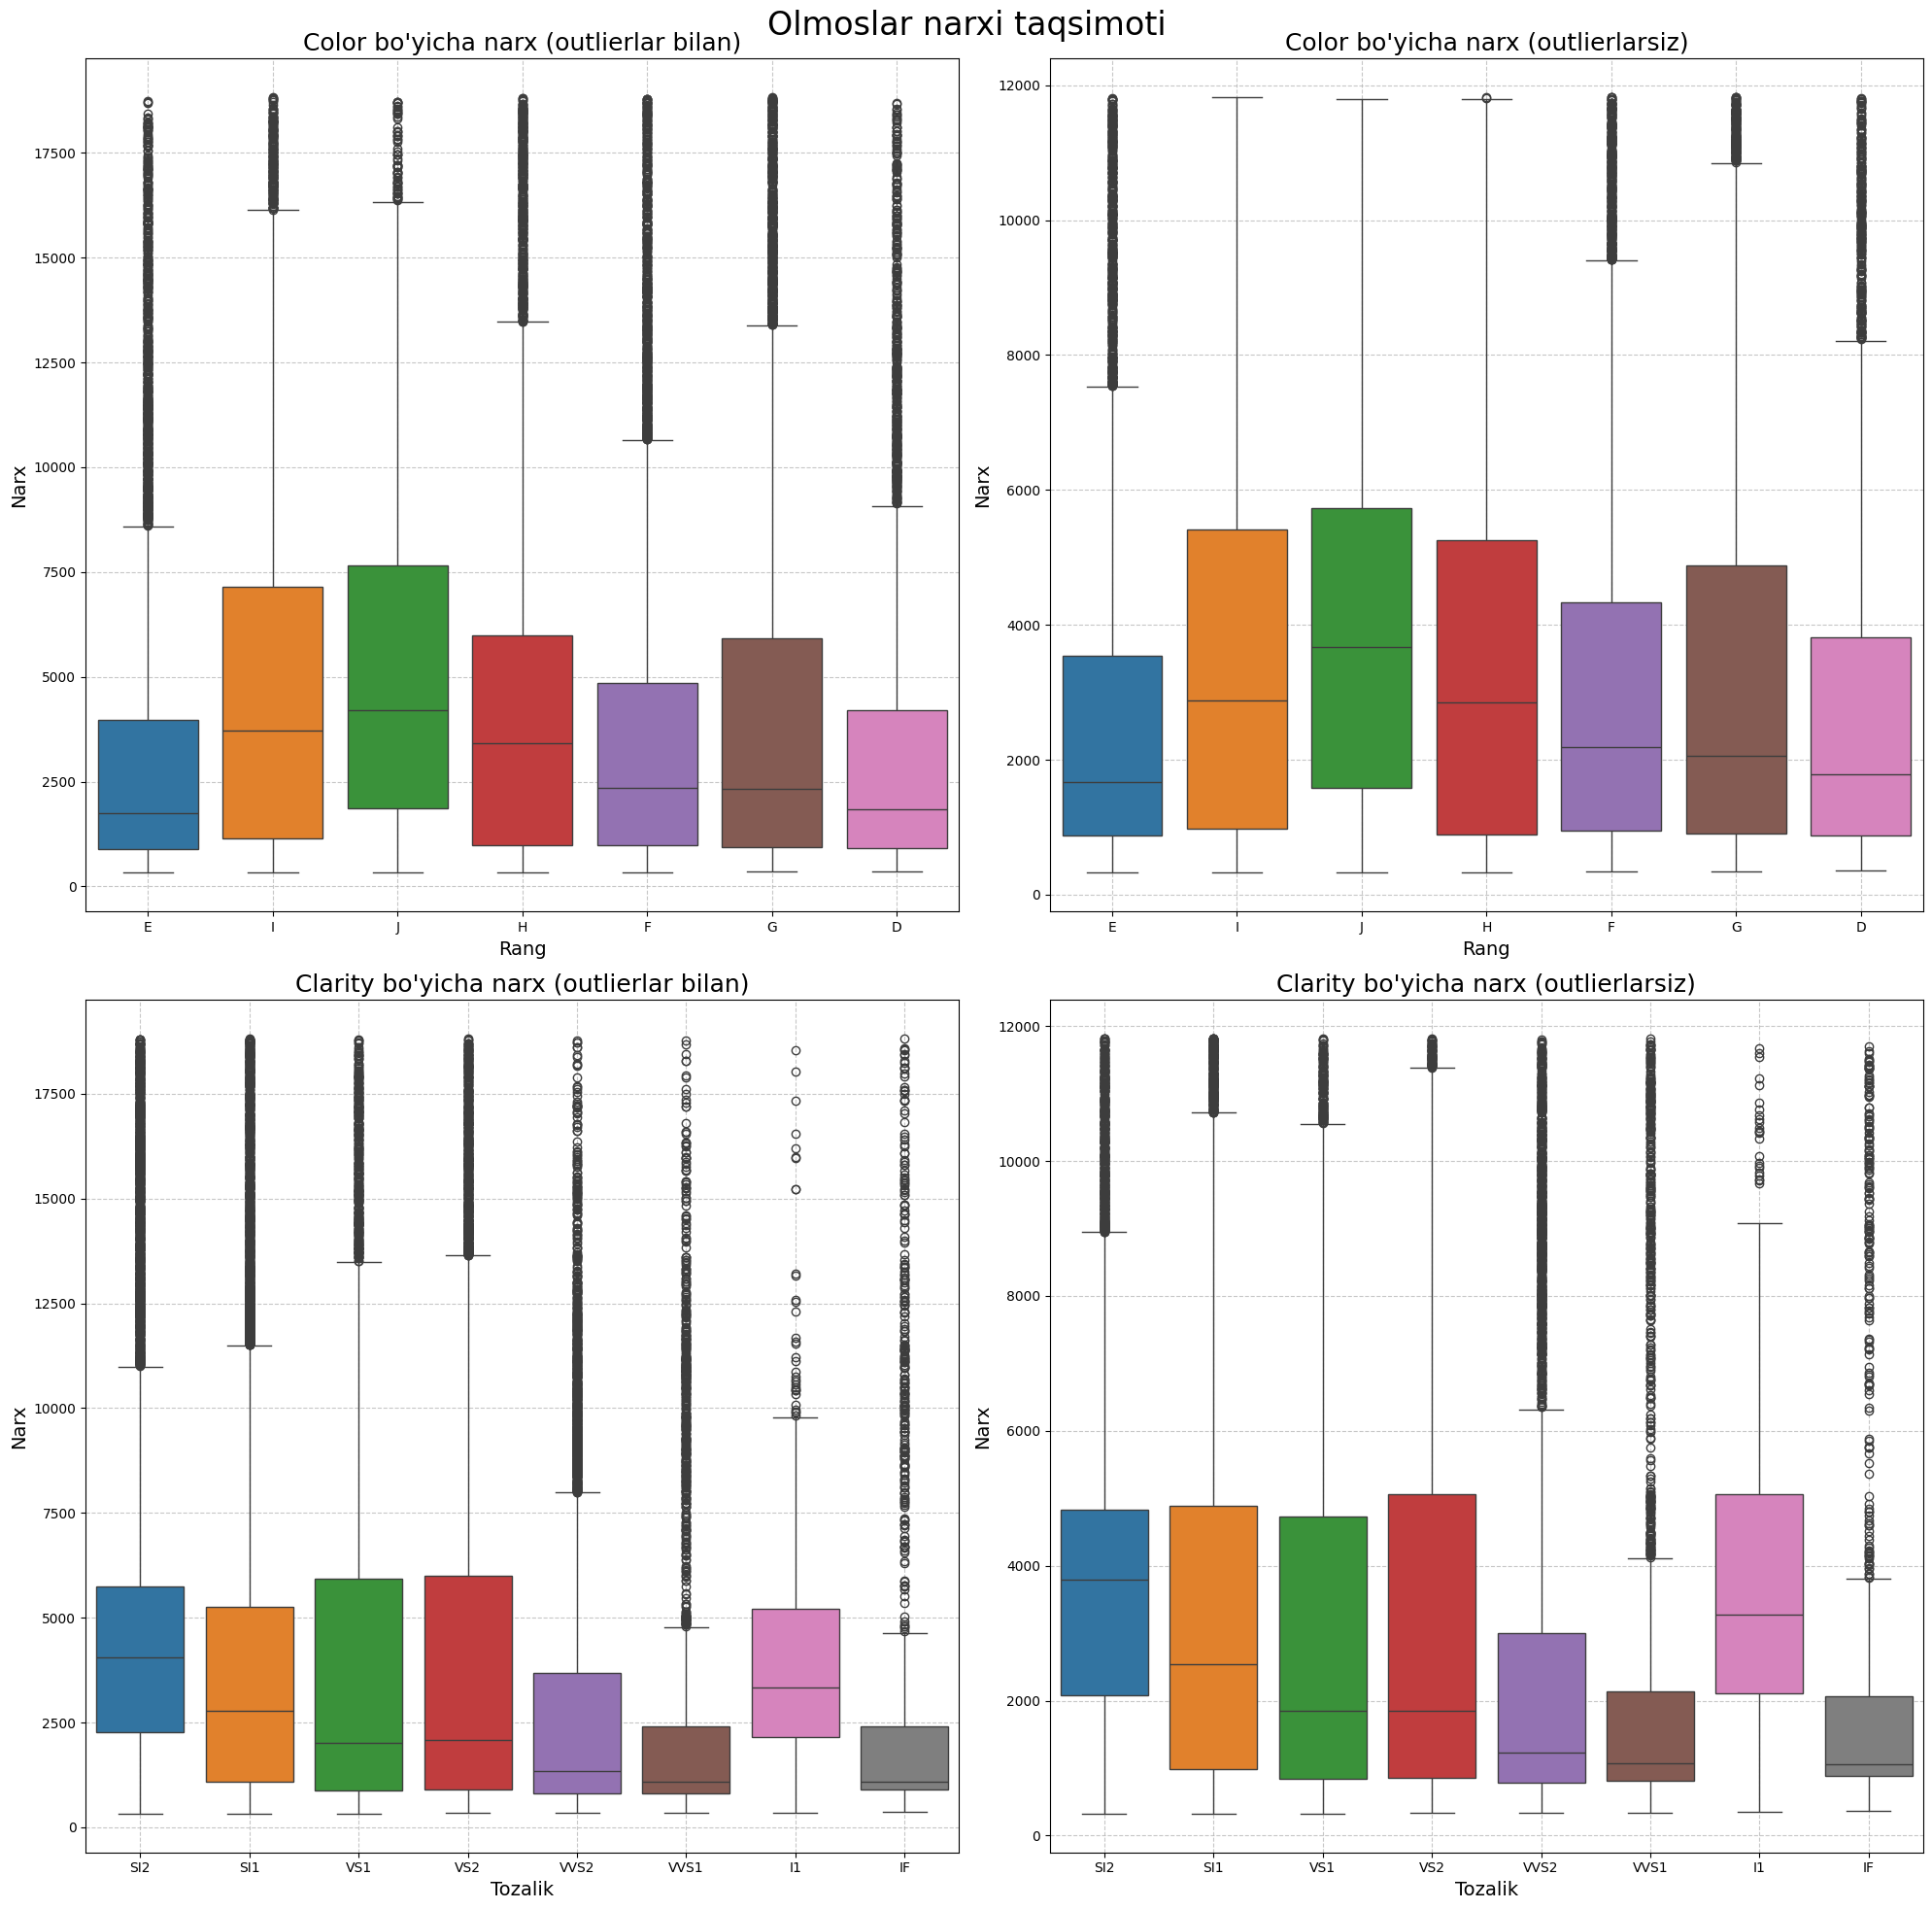

In [10]:


# Outlierslarni aniqlash va olib tashlash
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Grafiklarni chizish
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Olmoslar narxi taqsimoti', fontsize=24)

# 1. Color bo'yicha narx taqsimoti (outlierlar bilan)
sns.boxplot(x='color', y='price', data=df, ax=axs[0, 0], hue='color', legend=False)
axs[0, 0].set_title('Color bo\'yicha narx (outlierlar bilan)', fontsize=18)
axs[0, 0].set_xlabel('Rang', fontsize=14)
axs[0, 0].set_ylabel('Narx', fontsize=14)

# 2. Color bo'yicha narx taqsimoti (outlierlarsiz)
sns.boxplot(x='color', y='price', data=df_no_outliers, ax=axs[0, 1], hue='color', legend=False)
axs[0, 1].set_title('Color bo\'yicha narx (outlierlarsiz)', fontsize=18)
axs[0, 1].set_xlabel('Rang', fontsize=14)
axs[0, 1].set_ylabel('Narx', fontsize=14)

# 3. Clarity bo'yicha narx taqsimoti (outlierlar bilan)
sns.boxplot(x='clarity', y='price', data=df, ax=axs[1, 0], hue='clarity', legend=False)
axs[1, 0].set_title('Clarity bo\'yicha narx (outlierlar bilan)', fontsize=18)
axs[1, 0].set_xlabel('Tozalik', fontsize=14)
axs[1, 0].set_ylabel('Narx', fontsize=14)

# 4. Clarity bo'yicha narx taqsimoti (outlierlarsiz)
sns.boxplot(x='clarity', y='price', data=df_no_outliers, ax=axs[1, 1], hue='clarity', legend=False)
axs[1, 1].set_title('Clarity bo\'yicha narx (outlierlarsiz)', fontsize=18)
axs[1, 1].set_xlabel('Tozalik', fontsize=14)
axs[1, 1].set_ylabel('Narx', fontsize=14)

# Grafiklarni chiroyli qilish
for ax in axs.flat:
    ax.tick_params(axis='x')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [11]:
# Statistik ma'lumotlarni chiqarish
print("Outlierlar soni:", len(df) - len(df_no_outliers))
print("Outlierlar foizi: {:.2f}%".format((len(df) - len(df_no_outliers)) / len(df) * 100))

print("\nOutlierlari bilan narx statistikasi:")
print(df['price'].describe())

print("\nOutlierlarsiz narx statistikasi:")
print(df_no_outliers['price'].describe())

Outlierlar soni: 3572
Outlierlar foizi: 6.62%

Outlierlari bilan narx statistikasi:
count    53940.000000
mean      3925.846774
std       3980.194252
min        326.000000
25%        956.000000
50%       2404.000000
75%       5302.000000
max      18823.000000
Name: price, dtype: float64

Outlierlarsiz narx statistikasi:
count    50368.000000
mean      3147.597860
std       2744.665057
min        326.000000
25%        912.000000
50%       2182.500000
75%       4643.250000
max      11820.000000
Name: price, dtype: float64


### Kesim(cut) va narxning nisbati.

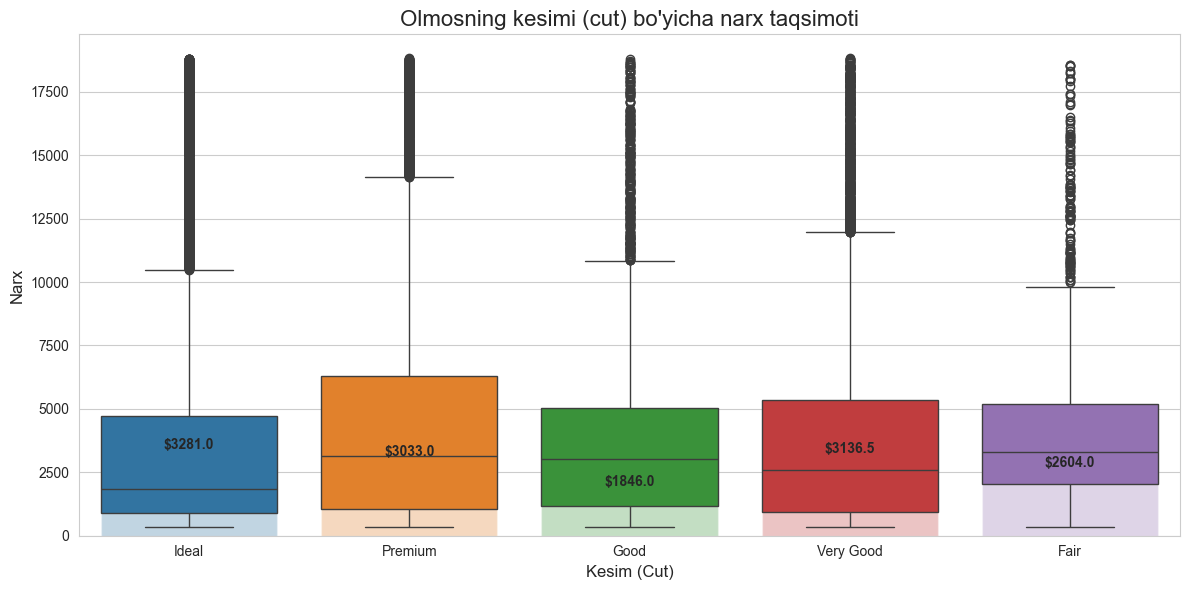

Cut kategoriyalari bo'yicha narx statistikasi:
             count         mean          std    min      25%     50%      75%  \
cut                                                                             
Fair        1552.0  4336.236469  3551.221556  337.0  2050.75  3281.0  5185.25   
Good        4699.0  3936.877846  3692.379175  327.0  1155.50  3033.0  5021.00   
Ideal      22837.0  3493.774970  3816.336594  326.0   886.00  1846.0  4729.00   
Premium    13218.0  4582.256771  4346.182004  326.0  1050.00  3136.5  6290.75   
Very Good  11634.0  3968.999312  3915.998045  336.0   921.00  2604.0  5338.00   

               max  
cut                 
Fair       18574.0  
Good       18788.0  
Ideal      18806.0  
Premium    18823.0  
Very Good  18818.0  

Cut kategoriyalari bo'yicha olmoslar soni:
cut
Ideal        22837
Premium      13218
Very Good    11634
Good          4699
Fair          1552
Name: count, dtype: int64


In [12]:



# Grafikni sozlash
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Boxplot va barplot kombinatsiyasini chizish
ax = sns.boxplot(x='cut', y='price', data=df, hue='cut', legend=False)
sns.barplot(x='cut', y='price', data=df, estimator=lambda x: x.median(), 
            errorbar=None, alpha=0.3, hue='cut', legend=False)

# Grafikni bezash
plt.title("Olmosning kesimi (cut) bo'yicha narx taqsimoti", fontsize=16)
plt.xlabel("Kesim (Cut)", fontsize=12)
plt.ylabel("Narx", fontsize=12)

# Median qiymatlarni ustunlar ustiga yozish
medians = df.groupby('cut')['price'].median().round(2)
for i, median in enumerate(medians):
    ax.text(i, median, f'${median}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Statistik ma'lumotlarni chiqarish
print("Cut kategoriyalari bo'yicha narx statistikasi:")
print(df.groupby('cut')['price'].describe())

print("\nCut kategoriyalari bo'yicha olmoslar soni:")
print(df['cut'].value_counts())

### Karat va narxning scatter plot

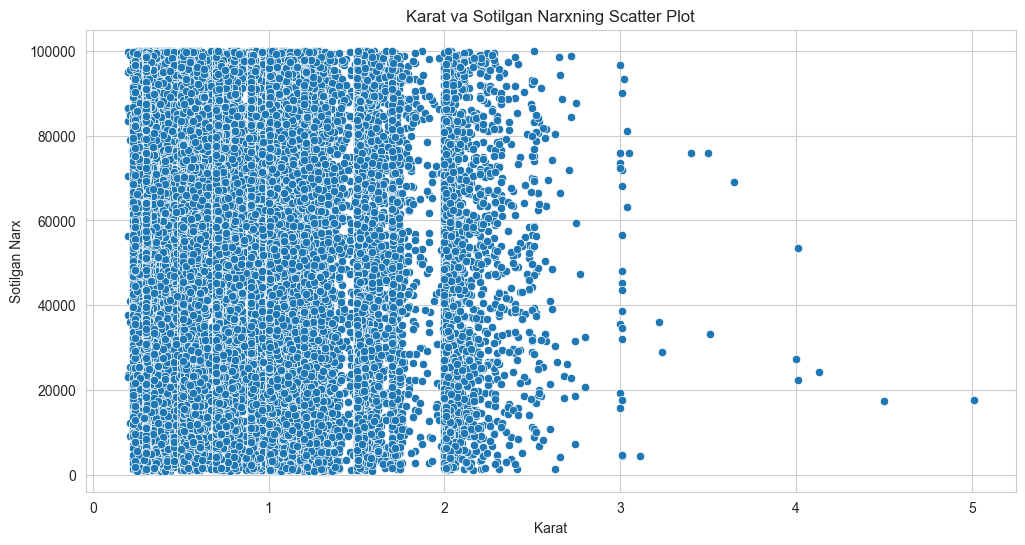

In [13]:

plt.figure(figsize=(12, 6))
sns.scatterplot(x='carat', y='sold', data=df)
plt.title('Karat va Sotilgan Narxning Scatter Plot')
plt.xlabel('Karat')
plt.ylabel('Sotilgan Narx')
plt.show()

### Karat va narxning regression line

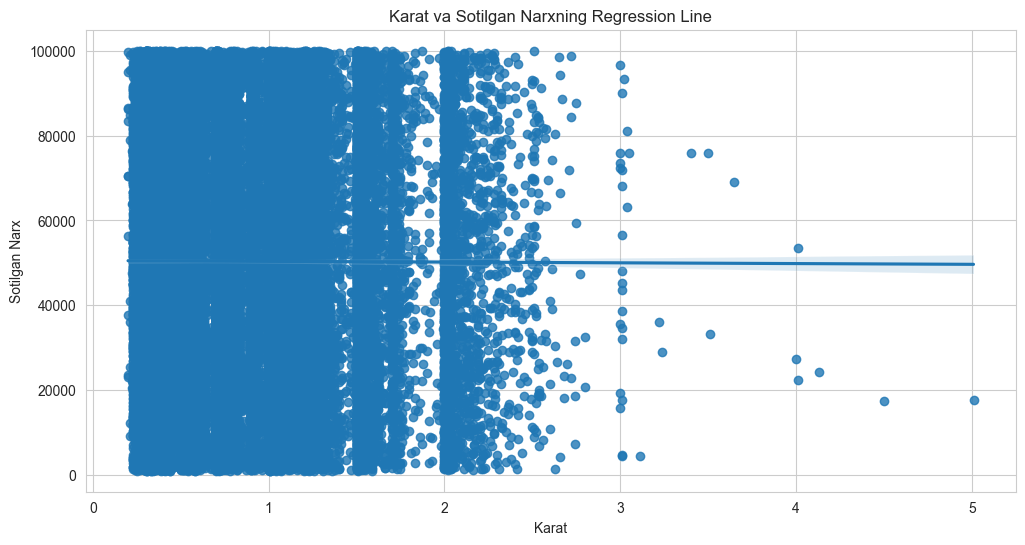

In [14]:

plt.figure(figsize=(12, 6))
sns.regplot(x='carat', y='sold', data=df)
plt.title('Karat va Sotilgan Narxning Regression Line')
plt.xlabel('Karat')
plt.ylabel('Sotilgan Narx')
plt.show()


# egression line y=mx+c tenglamasiga asoslanadi, bu yerda:

# y - bashorat qilinayotgan qiymat (sotilgan narx).
# m - regressiya chizig'ining nishab koeffitsienti.
# x - kiritilayotgan qiymat (karat).
# c - y kesishish nuqtasi.
# Regression line nimani ifodalaydi:

# Trend: Regression chizig'i ma'lumotlarning umumiy tendensiyasini ko'rsatadi. Agar chiziq yuqoriga ko'tarilsa, bu karat oshgani sari narx 
# ham oshishini anglatadi (pozitiv korrelyatsiya). Agar chiziq pastga tushsa, bu karat oshgani sari narx pasayishini anglatadi (negativ korrelyatsiya).
# Bog'liqlik darajasi: Chiziq qanchalik tik bo'lsa, bog'liqlik shunchalik kuchli bo'ladi. Nisbatan tekis chiziq esa bog'liqlik kamligini anglatadi.
# Bashorat: Regression chizig'i yordamida karat qiymati asosida sotilgan narxni bashorat qilish mumkin. Masalan, 1 karat qiymatida regression 
# chizig'i sotilgan narxni qanchaga tengligini ko'rsatadi.


### Mamlakat, yil va o'rtacha narx bo'yicha pivot table yaratish

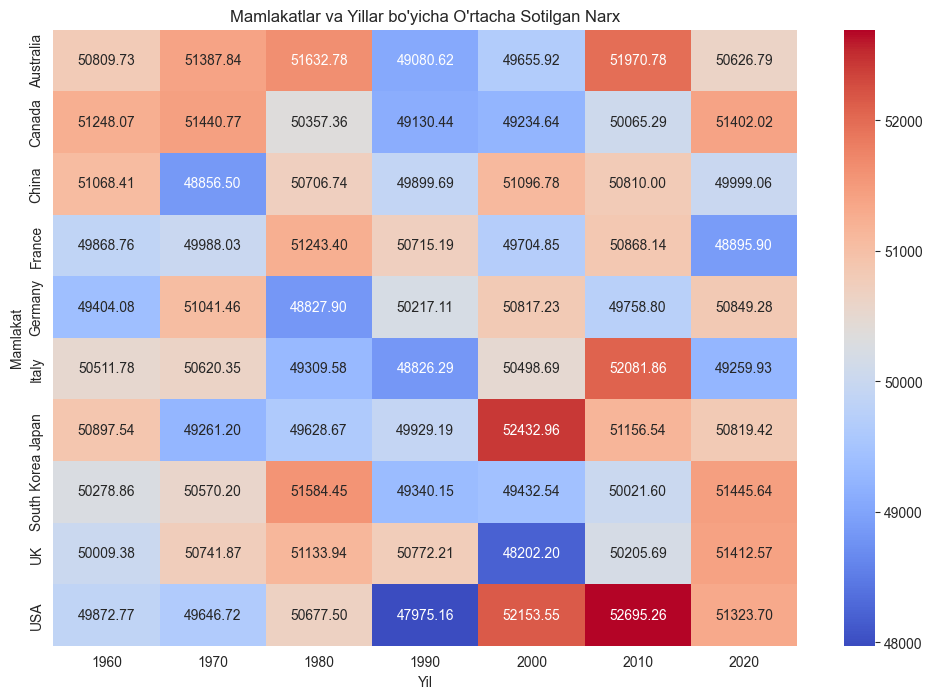

In [15]:


pivot_table = df.pivot_table(values='sold', index='country', columns='years', aggfunc='mean')

# Pivot tableni heatmap yordamida ko'rsatish
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Mamlakatlar va Yillar bo\'yicha O\'rtacha Sotilgan Narx')
plt.xlabel('Yil')
plt.ylabel('Mamlakat')
plt.show()
